In [1]:
# By Dominic Eggerman
## A look at historic HH forward curve prices

In [2]:
# Imports
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Obtain data from EIA file
df = pd.read_excel("EIA HH Data.xls", sheet_name="Future")

# Convert date format and set index
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

# Take data since October 2009 (arbitrary)
df = df["10/1/2009":]

df.head()
# More to follow

,Natural Gas Futures Contract 1 (Dollars per Million Btu),Natural Gas Futures Contract 2 (Dollars per Million Btu),Natural Gas Futures Contract 3 (Dollars per Million Btu),Natural Gas Futures Contract 4 (Dollars per Million Btu)
Date,,,,
2009-10-01,4.47,5.33,5.64,5.70
2009-10-02,4.72,5.52,5.82,5.87
2009-10-05,4.99,5.72,6.00,6.04
2009-10-06,4.88,5.63,5.91,5.96
2009-10-07,4.90,5.68,5.98,6.03


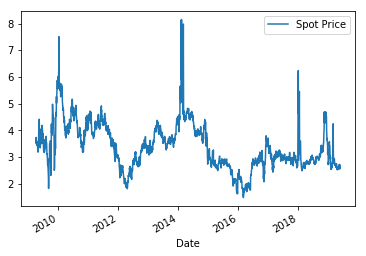

In [4]:
# Get spot prices
spot = pd.read_excel("EIA HH Data.xls", sheet_name="Spot", names=["Date", "Spot Price"])
spot["Date"] = pd.to_datetime(spot["Date"])
spot.set_index("Date", inplace=True)
spot = spot["4/1/2009":]

# Group and aggregate by month to get a poor man's curve
fwd = spot.groupby(by=[spot.index.year, spot.index.month]).mean()
fwd.index.set_names(["Year", "Month"], inplace=True)
# Graph this curve
spot.plot()

In [5]:
# Storage parameters

current_inv = 0          # Current inventory
lease = 100000           # MMbtu of lease capacity
x_limit = 0.15           # % of lease that can be injected during any month
w_limit = 0.25           # % of lease that can be withdrawn during any month
x_period = range(4, 11)  # Injection months (April - October)

In [37]:
# Lease strategy function
## Object is to use a forward curve to determine best times to inject and sell gas while remaining within the lease parameters
def strat(fwd_curve):
    # Split curve into injection and withdrawal months, then sort by price
    inj = fwd_curve.iloc[(fwd_curve.index.get_level_values("Month") >= min(x_period)) & (fwd_curve.index.get_level_values("Month") <= max(x_period))]
    wit = fwd_curve.iloc[(fwd_curve.index.get_level_values("Month") < min(x_period)) | (fwd_curve.index.get_level_values("Month") > max(x_period))]
    inj.sort_values(by="Spot Price", inplace=True)
    wit.sort_values(by="Spot Price", inplace=True)
    print(inj)
    print(wit)
#     for m in fwd_curve.index.get_level_values("Month").values:
#         print("Month: {0}, Inv: {1}".format(m, current_inv))
    fwd_curve.plot()

C:\Users\deggerman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
C:\Users\deggerman\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


            Spot Price
Year Month            
2009 9        2.986667
     8        3.140952
     7        3.383636
     4        3.494762
     6        3.800455
     5        3.832500
     10       4.007727
            Spot Price
Year Month            
2009 11       3.663000
2010 3        4.290870
     2        5.320000
2009 12       5.347727
2010 1        5.832105


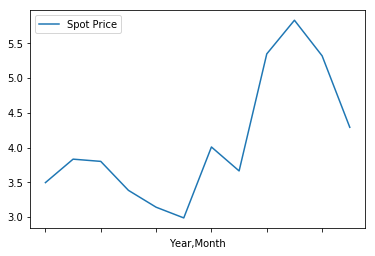

In [38]:
strat(fwd[0:12])